In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import os
import re
from pyproj import Transformer
from scipy.spatial import cKDTree
from sklearn.metrics import r2_score, mean_squared_error
from scipy.optimize import root
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

from grafi import (
    display_error_tables,
    display_winddir_met,
    display_cosine,
    plot_metric_res_2,
    plot_metric_res,
    plot_wind_speed_comparison,
    plot_week_comparison_with_dates,
    plot_wind_direction_comparison_bezigrad,
    plot_wind_speed_error_by_hour_multistation,
    plot_wind_speed_error_by_month_all_stations,
    plot_wind_errors_all_stations,
    plot_wdir_error_by_wspeed_all_stations,
    plot_absolute_wind_speed_error_windrose,
    compare_wind_plots_for_stations,
    plot_wind_speed_error_windrose,
    plot_absolute_wind_direction_error_windrose,
    plot_wind_direction_error_windrose
)
from utils import (
    finalize_df,
    evaluate_model,
    prepare_observations,
    get_model_stations_data,
)
from postaje import (
    get_stations, get_names
)

In [2]:
base_path = "C:\\Users\\alex\\Desktop\\veter_data"

if not os.path.exists(base_path):
    print(f"{base_path} ne obstaja")

In [3]:
# meteopgt2021.all
file_2021 = os.path.join(base_path, 'meteopgt2021.all')
meteopgt_2021 = prepare_observations(file_2021, 2021)

# meteopgt2023.all
file_2023 = os.path.join(base_path, 'meteopgt2023.all')
meteopgt_2023 = prepare_observations(file_2023, 2023)

In [4]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [5]:
base_path_250_2021 = os.path.join(base_path, "VeterPodatkiARSO", "WND_ASCII")
if not os.path.exists(base_path_250_2021):
    print(f"{base_path_250_2021}' ne obstja")

In [6]:
stations = get_stations()
names = get_names()
stations = get_model_stations_data(base_path_250_2021, stations, "025km_2021")

loaded


In [7]:
df_2021 = finalize_df(meteopgt_2021, stations)
df_2023 = finalize_df(meteopgt_2023, stations)

# Eval

In [8]:
results_2021 = evaluate_model(stations, df_2021)
print(results_2021)

               Name      MAE    RMSE    MAPE  Cosine      R2     Bias
0        bezigrad_u   0.3691  0.5886   37.33  0.6901  0.7895   0.0967
1        bezigrad_v   0.3244  0.4639   31.06  0.6901  0.8241   0.1108
2   bezigrad_WSpeed   0.3931  0.6335   31.34     NaN  0.6886  -0.2233
3     bezigrad_WDir  35.9436     NaN     NaN     NaN     NaN -11.7312
4           borst_u   0.5949  6.8740   68.59  0.6228  0.2405  -0.0049
5           borst_v   0.4778  3.3973   51.85  0.6228  0.3406  -0.0438
6      borst_WSpeed   0.5930  7.6440   41.47     NaN  0.2480  -0.3892
7        borst_WDir  41.9020     NaN     NaN     NaN     NaN   1.9515
8          let_lj_u   1.1697  1.6714  130.38  0.2216 -0.0236  -0.5860
9          let_lj_v   0.8484  1.1470   93.22  0.2216 -0.0880   0.1384
10    let_lj_WSpeed   0.8866  1.4094   62.83     NaN -0.2375  -0.3493
11      let_lj_WDir  73.7262     NaN     NaN     NaN     NaN  -5.2329
12          pasja_u   0.7245  1.1373   51.26  0.7115  0.3338   0.2257
13          pasja_v 

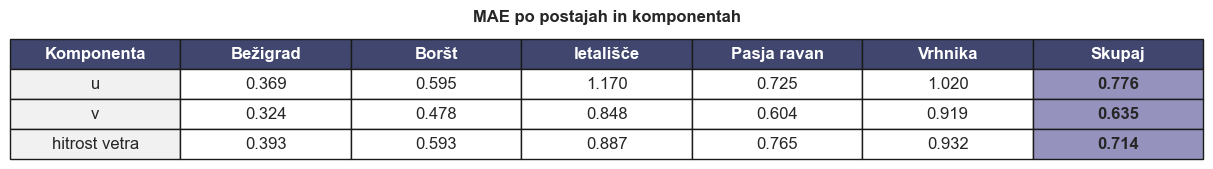

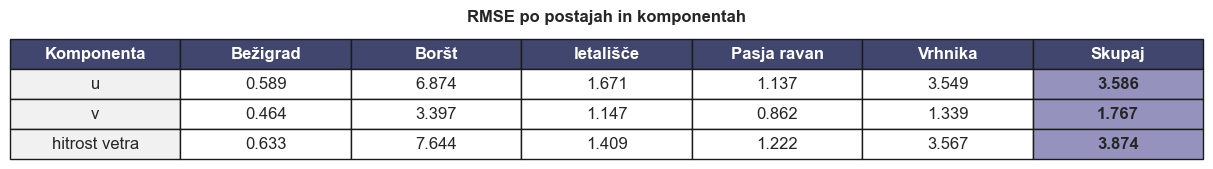

In [9]:
display_error_tables(results_2021, stations, n=names)

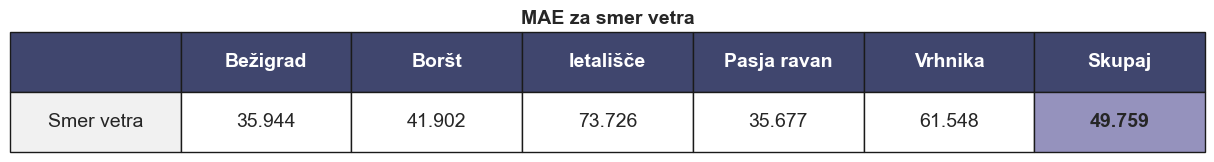

In [10]:
display_winddir_met(results_2021, stations, names)
display_cosine(results_2021, stations, names)

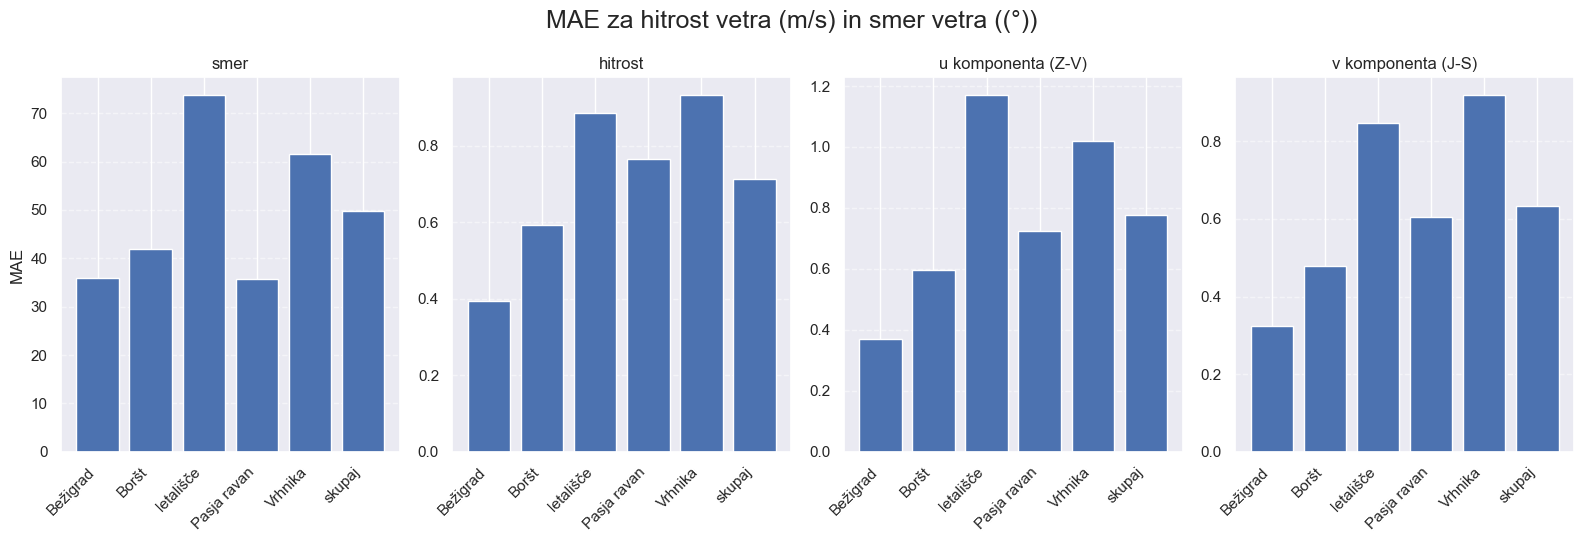

In [11]:
plot_metric_res(
    metric='MAE',
    df1=results_2021,
    names=names,
    title='MAE za hitrost vetra (m/s) in smer vetra ((°))'
)

plot_metric_res(
    metric='RMSE',
    df1=results_2021,
    names=names,
    title='RMSE za hitrost vetra (m/s)',
    ign=["WDir"]
)

plot_metric_res(
    metric='MAPE',
    df1=results_2021,
    names=names,
    title='MAPE (povprečna absolutna napaka v odstotkih) za hitrost vetra po komponentah in skupaj',
    ign=["WDir"]
)

# plot_metric_res_2(
#     metric='MAE',
#     df1=results_2021,
#     df2=results_2023,
#     names=names,
#     title='MAE za leta 2021 in 2023'
# )

In [12]:
compare_wind_plots_for_stations(df_2021, [s for s in stations])

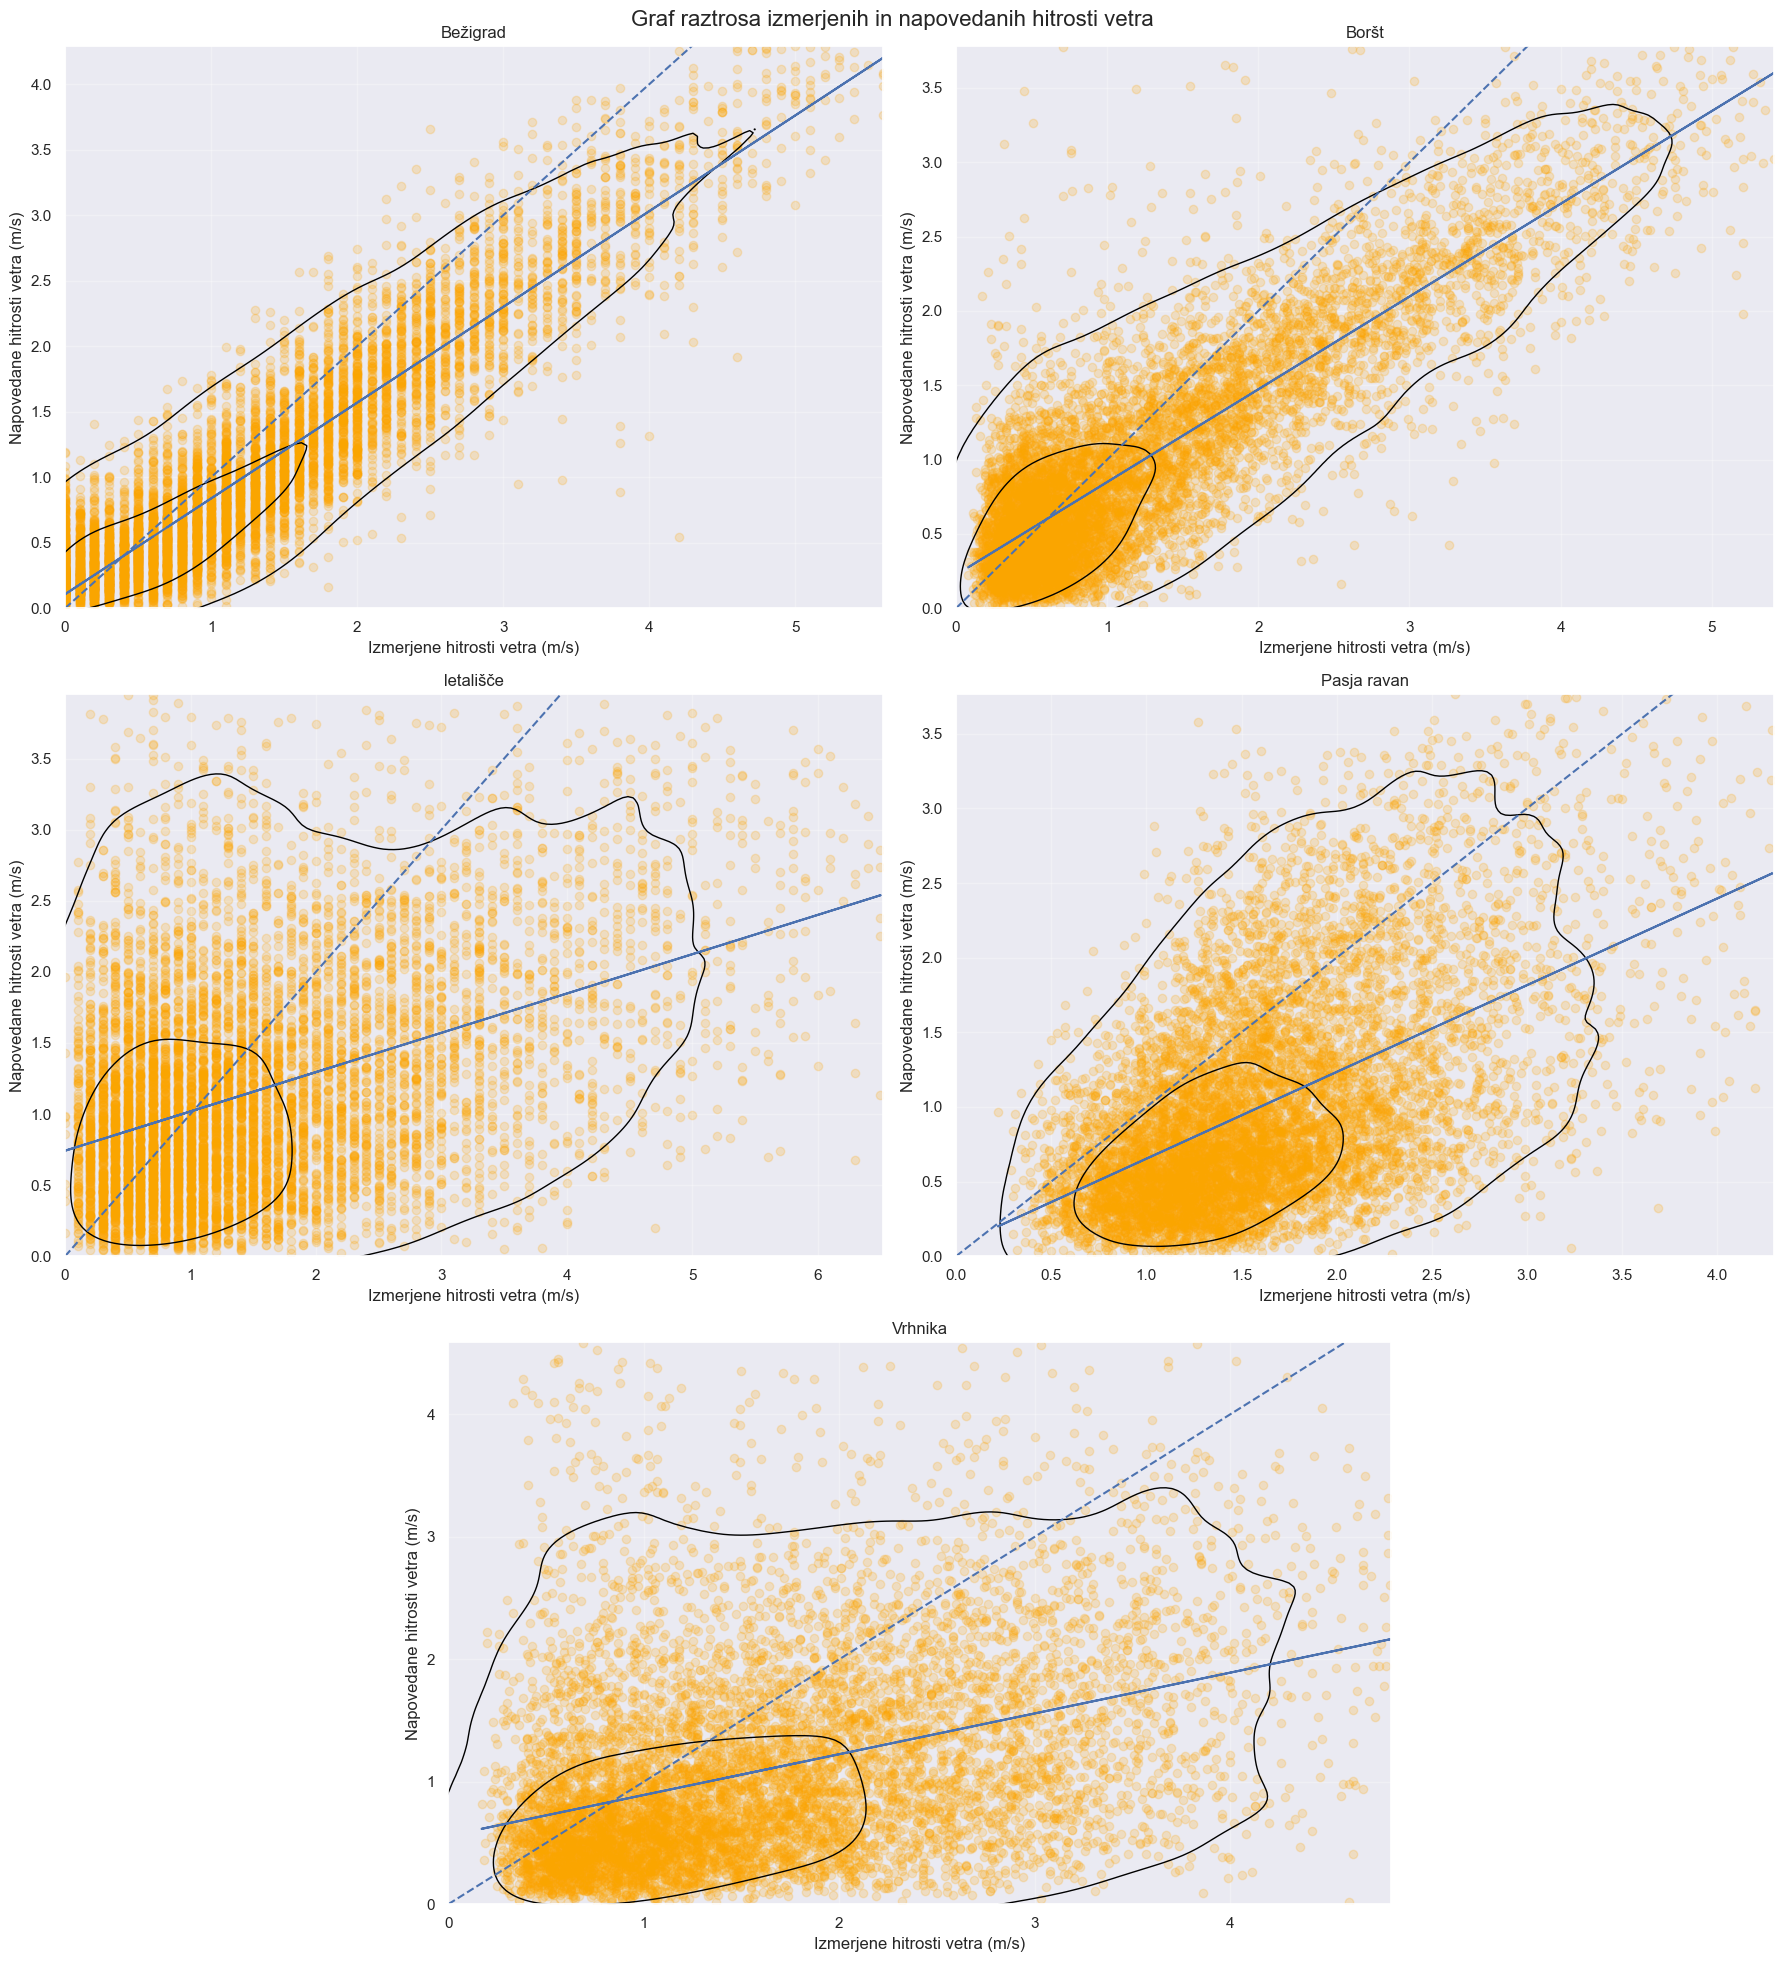

In [13]:
plot_wind_speed_comparison(df_2021, stations, names)

In [14]:
plot_wind_errors_all_stations(df=df_2021, stations=[s for s in stations], names=names, num_bins=15, min_wspeed=0.3)

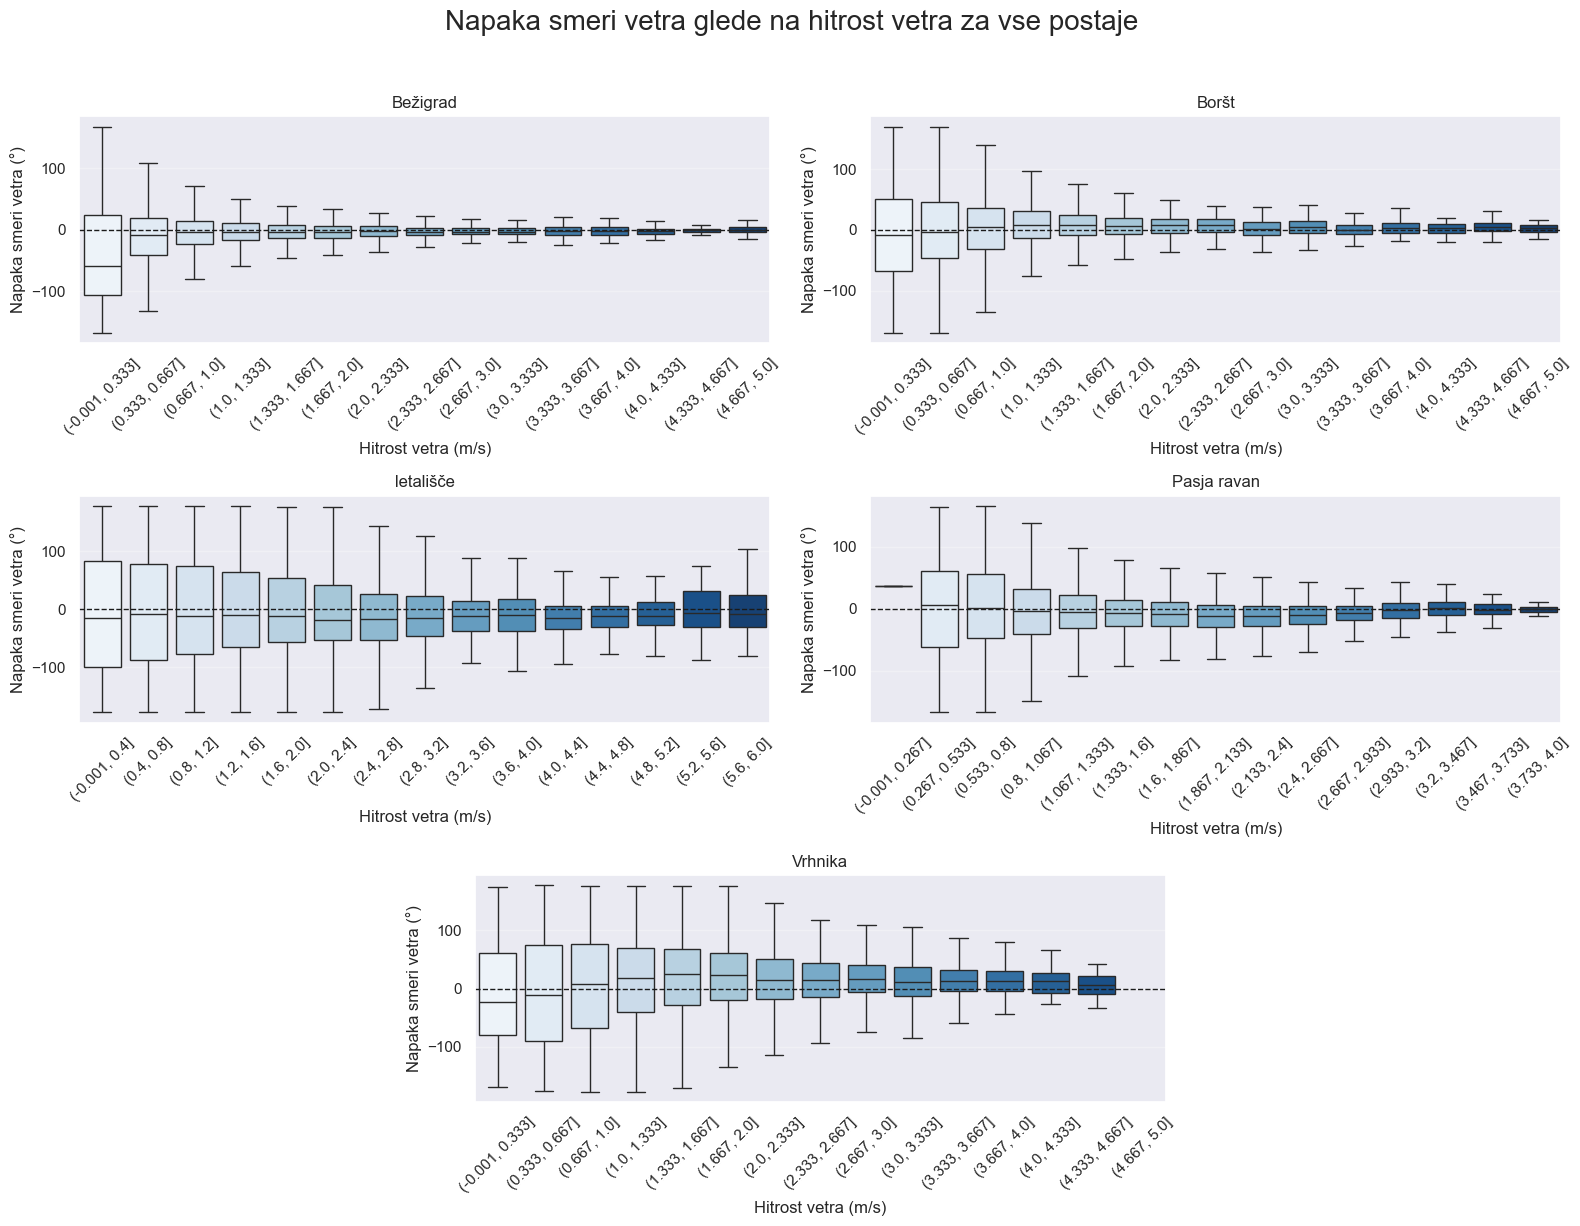

In [15]:
plot_wdir_error_by_wspeed_all_stations(df_2021, stations, num_bins=15, names=names)

<Figure size 1400x1500 with 0 Axes>

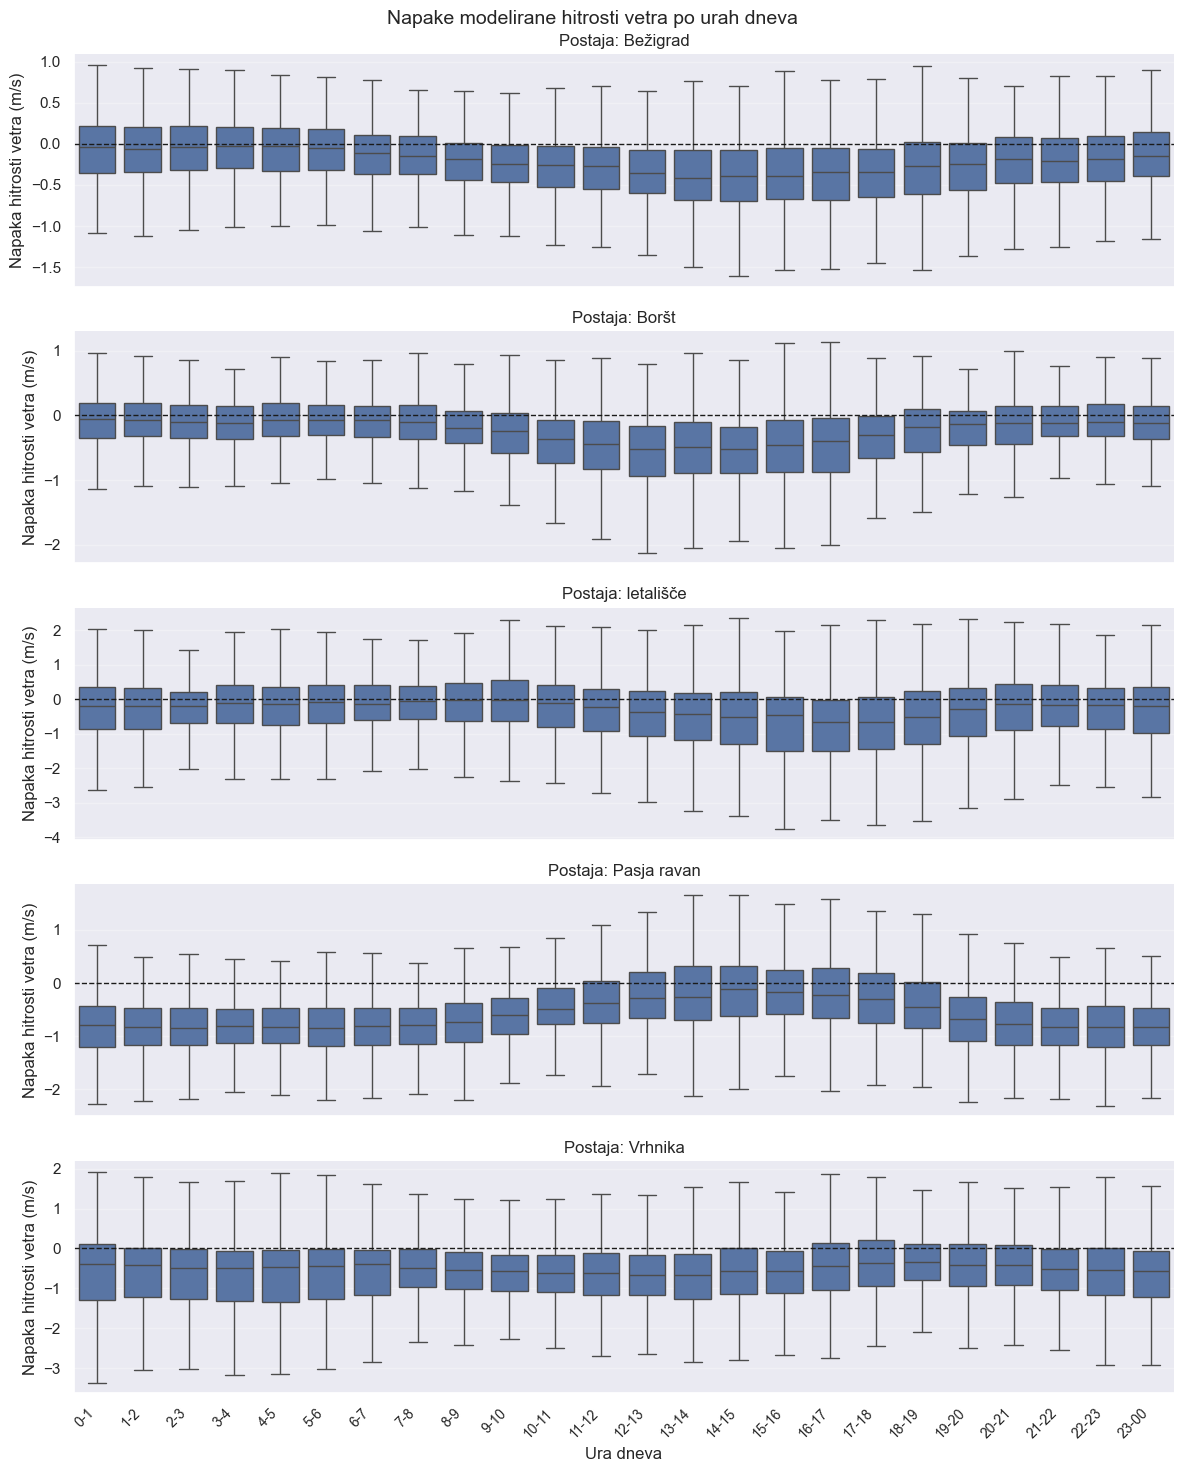

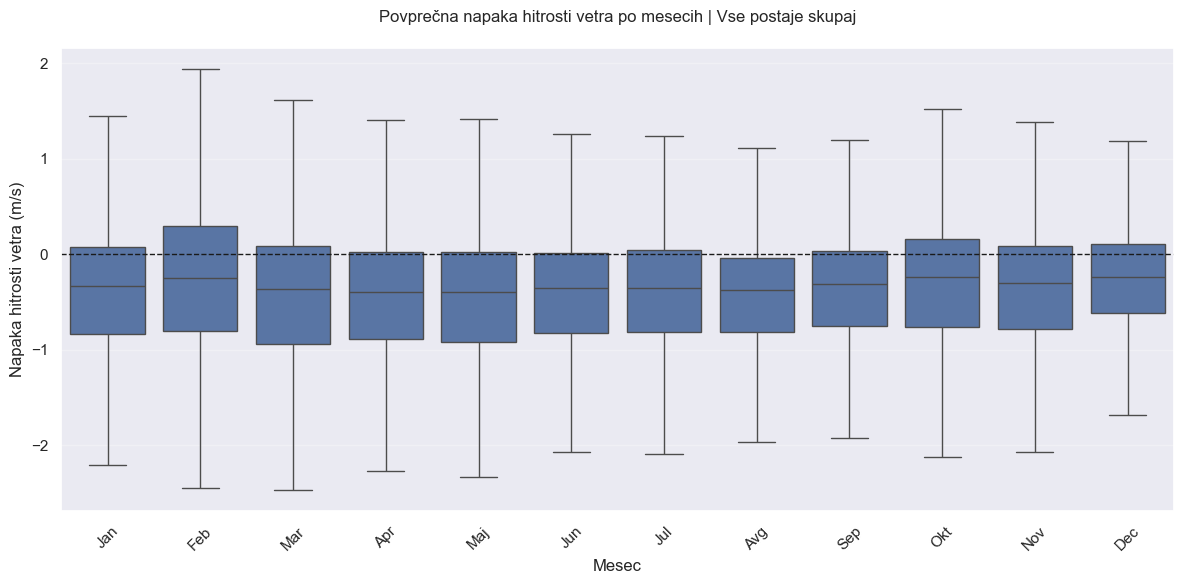

In [16]:
plot_wind_speed_error_by_hour_multistation(df_2021, [s for s in stations], names=names, stations_per_plot=5)

plot_wind_speed_error_by_month_all_stations(df_2021, [s for s in stations], names)

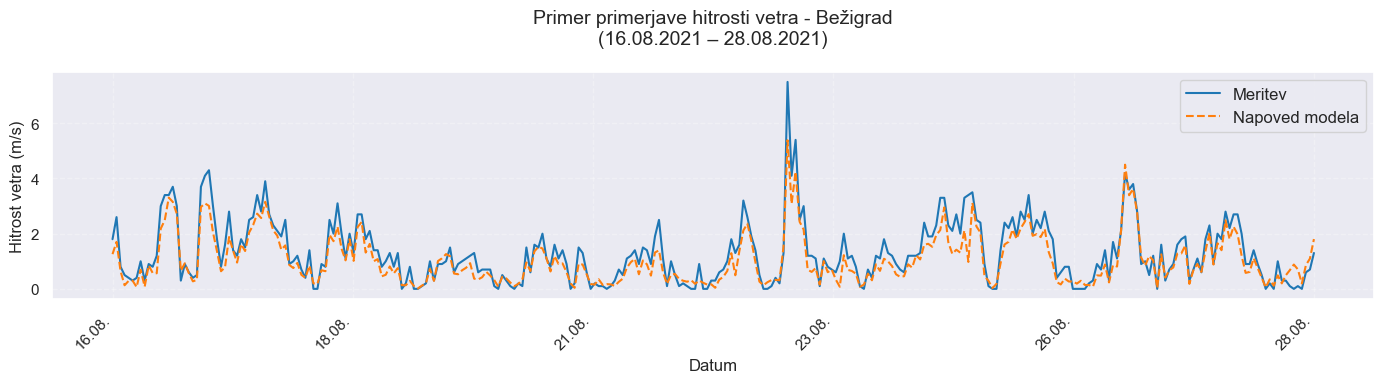

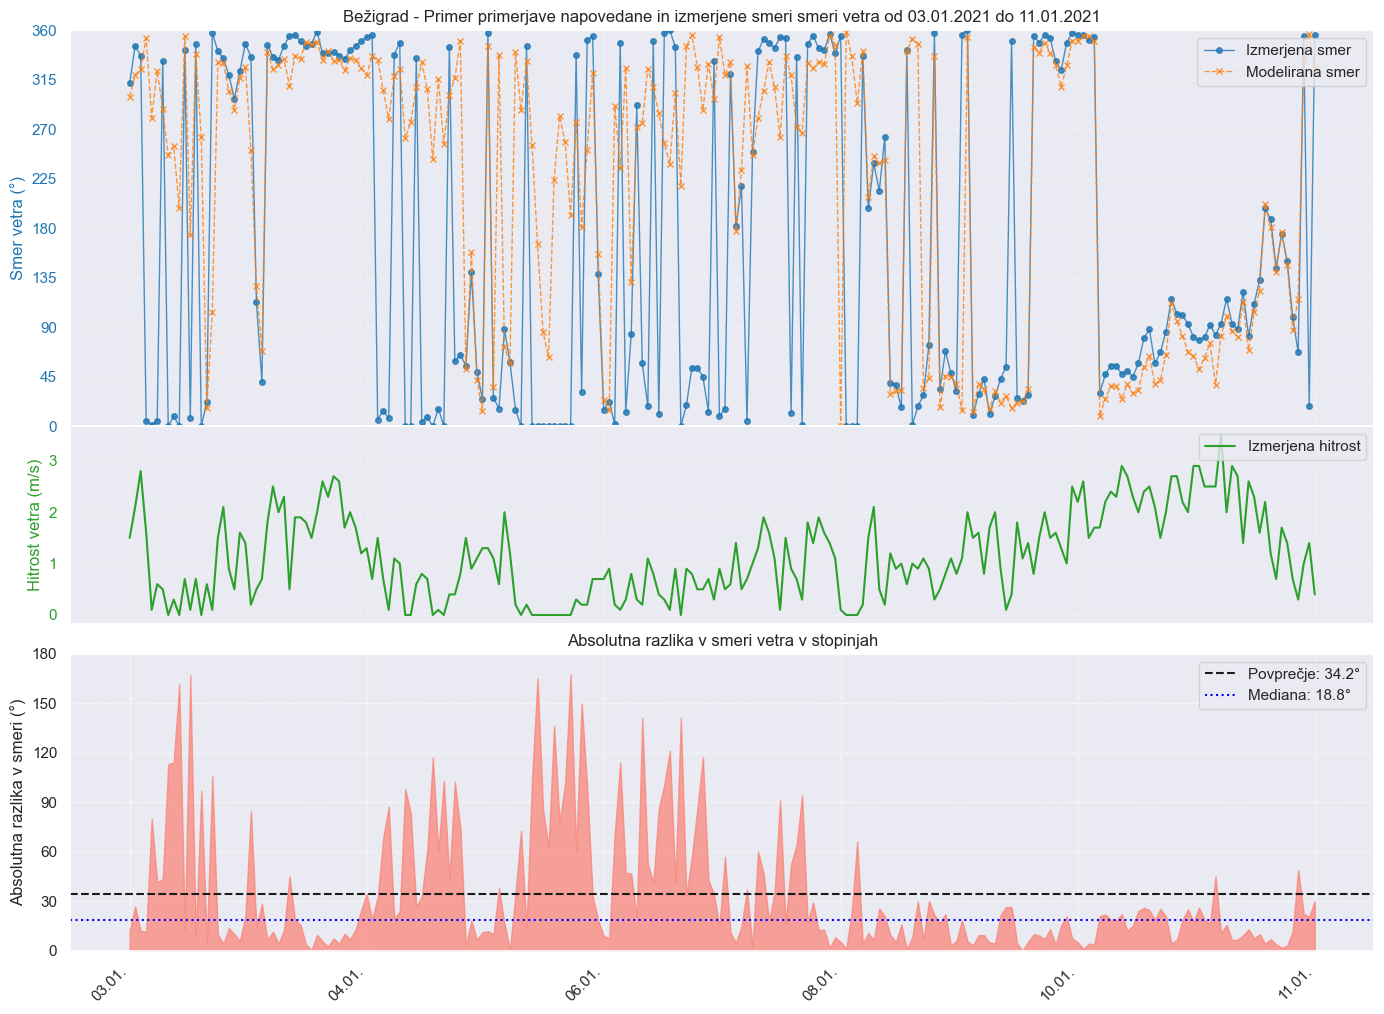

In [19]:
plot_week_comparison_with_dates(df_2021)

plot_wind_direction_comparison_bezigrad(df_2021, days=9)